In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/ab-test.csv")
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uid     44 non-null     object 
 1   diff    44 non-null     float64
 2   time    44 non-null     object 
 3   group   44 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


(None,
        uid        diff    time group
 0   user_1 -103.333333   after  test
 1   user_1   -6.000000  before  test
 2  user_18  -10.000000   after  test
 3  user_18   -3.500000  before  test
 4  user_19  -82.333333   after  test)

In [9]:
print(df["group"].unique())  
print(df["time"].unique())   
print(df.columns)

['test' 'control']
['after' 'before']
Index(['uid', 'diff', 'time', 'group'], dtype='object')


In [4]:
# Создание данных для каждого случая
control_before = df[(df["group"] == "control") & (df["time"] == "before")]["diff"]
test_before    = df[(df["group"] == "test")    & (df["time"] == "before")]["diff"]
control_after  = df[(df["group"] == "control") & (df["time"] == "after")]["diff"]
test_after     = df[(df["group"] == "test")    & (df["time"] == "after")]["diff"]

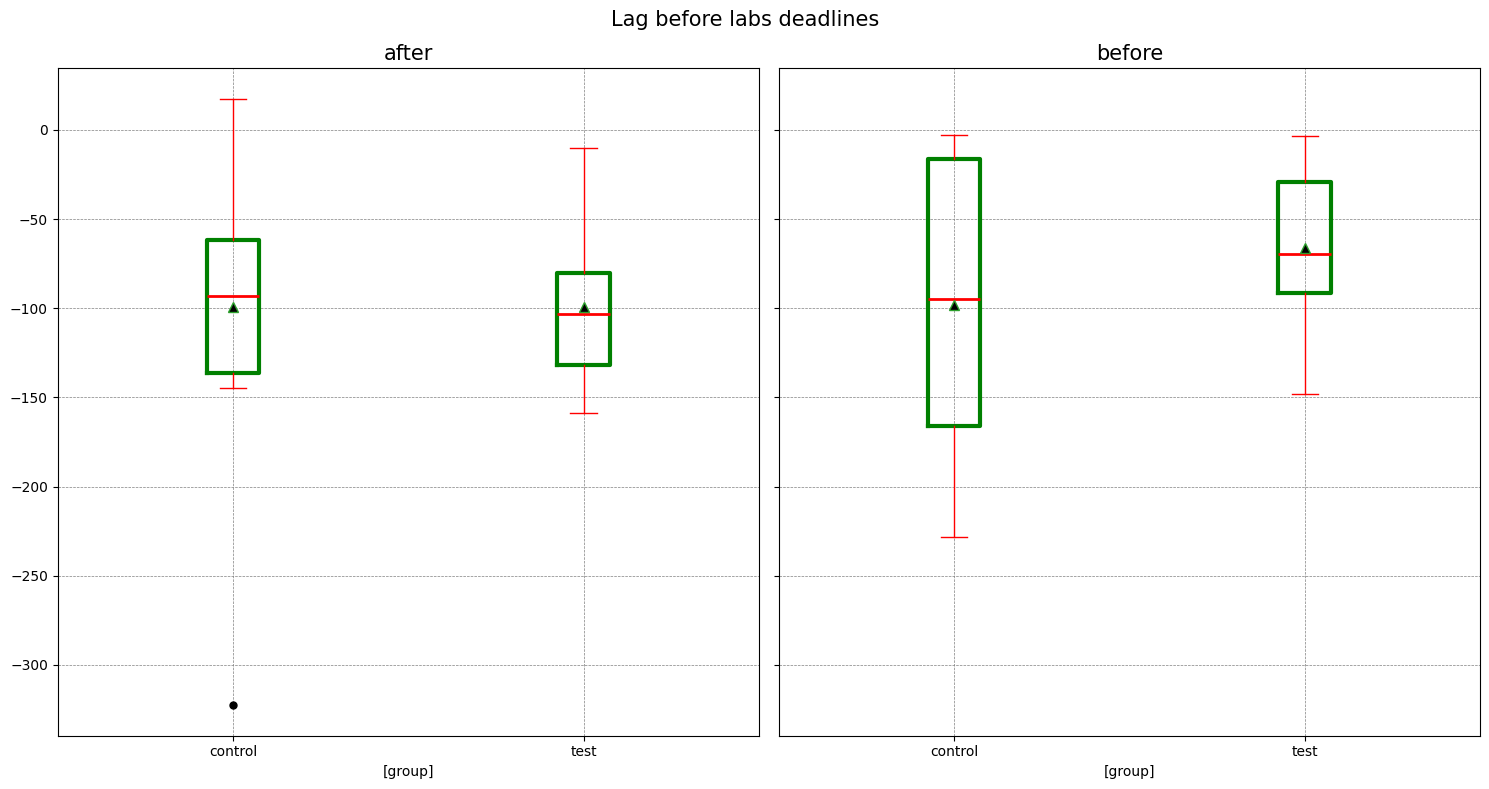

In [7]:
# Построение двух subplot-ов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
# --- AFTER
ax1.boxplot(
    [control_after, test_after],
    patch_artist=False,
    boxprops=dict(color='green', linewidth=3),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='red'),
    capprops=dict(color='red'),
    flierprops=dict(marker='o', markerfacecolor='black', markersize=5),
    showmeans=True,
    meanprops=dict(marker='^', markerfacecolor='black', markersize=7)
)
ax1.set_title("after", fontsize=15)
ax1.set_xticklabels(["control", "test"])
ax1.set_xlabel("[group]")
ax1.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
ax1.grid(True, axis='x', linestyle='--', linewidth=0.5, color='gray')
# --- BEFORE
ax2.boxplot(
    [control_before, test_before],
    patch_artist=False,
    boxprops=dict(color='green', linewidth=3),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='red'),
    capprops=dict(color='red'),
    flierprops=dict(marker='o', markerfacecolor='black', markersize=5),
    showmeans=True,
    meanprops=dict(marker='^', markerfacecolor='black', markersize=7)
)
ax2.set_title("before", fontsize=15)
ax2.set_xticklabels(["control", "test"])
ax2.set_xlabel("[group]")
ax2.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
ax2.grid(True, axis='x', linestyle='--', linewidth=0.5, color='gray')
# Общий заголовок
fig.suptitle("Lag before labs deadlines", fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
conn.close()

## Вопрос:
Каков был IQR контрольной группы до новостной ленты?

Приблизительный IQR составляет **60 часов**.
